## Getting the symbol probabilities and analysis

    After getting compression_metrics.csv


In [28]:
import os
import csv
import time
from collections import Counter

def calculate_symbol_probabilities(text):
    total_chars = len(text)
    frequency = Counter(text)
    probabilities = {char: (count / total_chars) * 100 for char, count in frequency.items()}
    return probabilities

def format_probabilities(probabilities):
    formatted = []
    for char, prob in sorted(probabilities.items()):
        # Whitespace characters
        if char == ' ':
            char = 'SPACE'
        elif char == '\n':
            char = '\\n (Newline)'
        elif char == '\t':
            char = '\\t (Tab)'
        elif char == '\r':
            char = '\\r (Carriage Return)'
        elif char == '\f':
            char = '\\f (Form Feed)'
        elif char == '\v':
            char = '\\v (Vertical Tab)'

        # Control characters
        elif char == '\b':
            char = '\\b (Backspace)'
        elif char == '\a':
            char = '\\a (Bell/Alert)'
        elif char == '\0':
            char = '\\0 (Null)'
        elif ord(char) == 0x1B:
            char = 'ESC (Escape)'

        # Punctuation and special symbols
        elif char == '\\':
            char = '\\\\ (Backslash)'
        elif char == '\'':
            char = "\\' (Single Quote)"
        elif char == '\"':
            char = '\\\" (Double Quote)'
        elif char == '`':
            char = '` (Backtick)'

        # Brackets and braces
        elif char == '(':
            char = '( (Open Parenthesis)'
        elif char == ')':
            char = ') (Close Parenthesis)'
        elif char == '[':
            char = '[ (Open Square Bracket)'
        elif char == ']':
            char = '] (Close Square Bracket)'
        elif char == '{':
            char = '{ (Open Curly Brace)'
        elif char == '}':
            char = '} (Close Curly Brace)'

        # Mathematical and logical symbols
        elif char == '+':
            char = '+ (Plus)'
        elif char == '-':
            char = '- (Minus)'
        elif char == '*':
            char = '* (Asterisk)'
        elif char == '/':
            char = '/ (Forward Slash)'
        elif char == '%':
            char = '% (Percent)'
        elif char == '=':
            char = '= (Equals)'
        elif char == '<':
            char = '< (Less Than)'
        elif char == '>':
            char = '> (Greater Than)'
        elif char == '&':
            char = '& (Ampersand)'
        elif char == '|':
            char = '| (Vertical Bar)'
        elif char == '^':
            char = '^ (Caret)'
        elif char == '~':
            char = '~ (Tilde)'

        # Punctuation
        elif char == '.':
            char = '. (Period/Dot)'
        elif char == ',':
            char = ', (Comma)'
        elif char == ':':
            char = ': (Colon)'
        elif char == ';':
            char = '; (Semicolon)'
        elif char == '!':
            char = '! (Exclamation)'
        elif char == '?':
            char = '? (Question Mark)'

        # Additional Unicode and special characters
        elif char == '…':
            char = '… (Ellipsis)'
        elif char == '—':
            char = '— (Em Dash)'
        elif char == '–':
            char = '– (En Dash)'
        elif char == '„':
            char = '„ (Double Low-9 Quotation Mark)'
        elif char == '"':
            char = '" (Left Double Quotation Mark)'
        elif char == '"':
            char = '" (Right Double Quotation Mark)'
        elif char == ''':
            char = '' (Left Single Quotation Mark)'
        elif char == ''':
            char = ' \' (Right Single Quotation Mark)'

        # Control character hex representation
        elif ord(char) < 32 or ord(char) == 127:
            char = f'\\x{ord(char):02x} (Control Character)'

        formatted.append(f"{char}: {prob:.6f}%")
    
    return ' '.join(formatted)

def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    original_size = os.path.getsize(file_path)

    start_time = time.time()
    probabilities = calculate_symbol_probabilities(text)
    end_time = time.time()

    time_taken = end_time - start_time

    # Placeholder values for compressed size and compression ratio
    compressed_size = original_size  # Replace with actual compressed size
    compression_ratio = 0.0          # Replace with actual compression ratio

    symbol_probabilities = format_probabilities(probabilities)

    return {
        'Filename': os.path.basename(file_path),
        'Original Size': original_size,
        'Compressed Size': compressed_size,
        'Compression Ratio (%)': compression_ratio,
        'Time (s)': time_taken,
        'Symbol Probabilities': symbol_probabilities
    }

def write_to_csv(data, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Filename', 'Original Size', 'Compressed Size', 'Compression Ratio (%)', 'Time (s)', 'Symbol Probabilities']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        writer.writerow(data)


input_file = 'sample/James C. Maxwell Biography.txt'  # Replace with your input file path
output_csv = 'output.csv'                      # Replace with your desired output CSV file path

file_data = process_file(input_file)
write_to_csv(file_data, output_csv)

print(f"Data written to {output_csv}")


Data written to output.csv


In [29]:
import pandas as pd
import csv
from typing import Dict

# use this if error occurs
def parse_symbol_probabilities2(prob_string: str) -> Dict[str, float]:
    """
    Parse symbol probability string into a dictionary
    
    Args:
        prob_string (str): Raw probability string
    
    Returns:
        Dict[str, float]: Parsed symbol probabilities
    """
    probabilities = {}
    # Remove trailing semicolon and split
    symbols = prob_string.rstrip('; ').split('; ')
    
    for symbol_prob in symbols:
        # Split only on the first colon to handle cases where symbol contains ':'
        parts = symbol_prob.split(':', 1)
        if len(parts) != 2:
            print(f"Skipping invalid entry: {symbol_prob}")
            continue
        symbol, prob_str = parts
        # Clean the prob_str
        prob_str = prob_str.strip().rstrip('%')
        if not prob_str:
            print(f"Skipping empty probability for symbol: {symbol}")
            continue
        try:
            prob = float(prob_str)
            probabilities[symbol] = prob
        except ValueError as e:
            print(f"Error converting '{prob_str}' to float for symbol '{symbol}': {e}")
    
    return probabilities


In [30]:
import pandas as pd
import csv
from typing import Dict

def parse_symbol_probabilities(prob_string: str) -> Dict[str, float]:
    """
    Parse symbol probability string into a dictionary.
    
    Args:
        prob_string (str): Raw probability string.
    
    Returns:
        Dict[str, float]: Parsed symbol probabilities.
    """
    probabilities = {}
    # Remove trailing semicolon and split
    symbols = prob_string.rstrip('; ').split('; ')
    
    for symbol_prob in symbols:
        symbol, _, prob_str = symbol_prob.partition(':')
        # Remove '%' and convert to float
        prob = float(prob_str.rstrip('%'))
        probabilities[symbol] = prob
    
    return probabilities


def transform_probabilities_to_csv(input_csv: str, output_csv: str):
    """
    Transform input CSV with symbol probabilities to expanded CSV
    
    Args:
        input_csv (str): Input CSV file path
        output_csv (str): Output CSV file path
    """
    # Read input CSV
    df = pd.read_csv(input_csv)
    
    # Process each row's symbol probabilities
    all_symbols = set()
    processed_data = []
    
    for _, row in df.iterrows():
        probabilities = parse_symbol_probabilities2(row['Symbol Probabilities'])
        all_symbols.update(probabilities.keys())
        processed_data.append(probabilities)
    
    # Create a new DataFrame with all symbols as columns
    result_df = pd.DataFrame(processed_data, columns=list(all_symbols))
    
    # Add original columns back
    result_df = pd.concat([df.drop('Symbol Probabilities', axis=1), result_df], axis=1)
    
    # Save to new CSV
    result_df.to_csv(output_csv, index=False)
    
    print(f"Transformed CSV saved to {output_csv}")

input_csv = 'output.csv'
output_csv = 'expanded_symbol_probabilities.csv'

transform_probabilities_to_csv(input_csv, output_csv)

Error converting '0.086096% \n (Newline): 1.140766% SPACE: 14.119673% \" (Double Quote): 0.043048% \' (Single Quote): 0.365906% ( (Open Parenthesis): 0.064572% ) (Close Parenthesis): 0.064572% , (Comma): 1.011623% - (Minus): 0.086096% . (Period/Dot): 0.774860% / (Forward Slash): 0.086096% 0: 0.043048% 1: 0.581145% 2: 0.043048% 3: 0.129143% 4: 0.043048% 5: 0.107619% 6: 0.107619% 7: 0.172191% 8: 0.365906% 9: 0.086096% : (Colon): 0.021524' to float for symbol '\t (Tab)': could not convert string to float: '0.086096% \\n (Newline): 1.140766% SPACE: 14.119673% \\" (Double Quote): 0.043048% \\\' (Single Quote): 0.365906% ( (Open Parenthesis): 0.064572% ) (Close Parenthesis): 0.064572% , (Comma): 1.011623% - (Minus): 0.086096% . (Period/Dot): 0.774860% / (Forward Slash): 0.086096% 0: 0.043048% 1: 0.581145% 2: 0.043048% 3: 0.129143% 4: 0.043048% 5: 0.107619% 6: 0.107619% 7: 0.172191% 8: 0.365906% 9: 0.086096% : (Colon): 0.021524'
Error converting '0.021524% ? (Question Mark): 0.043048% A: 0.25

Total Rows in DataFrame: 1
Total Unique Symbols: 0


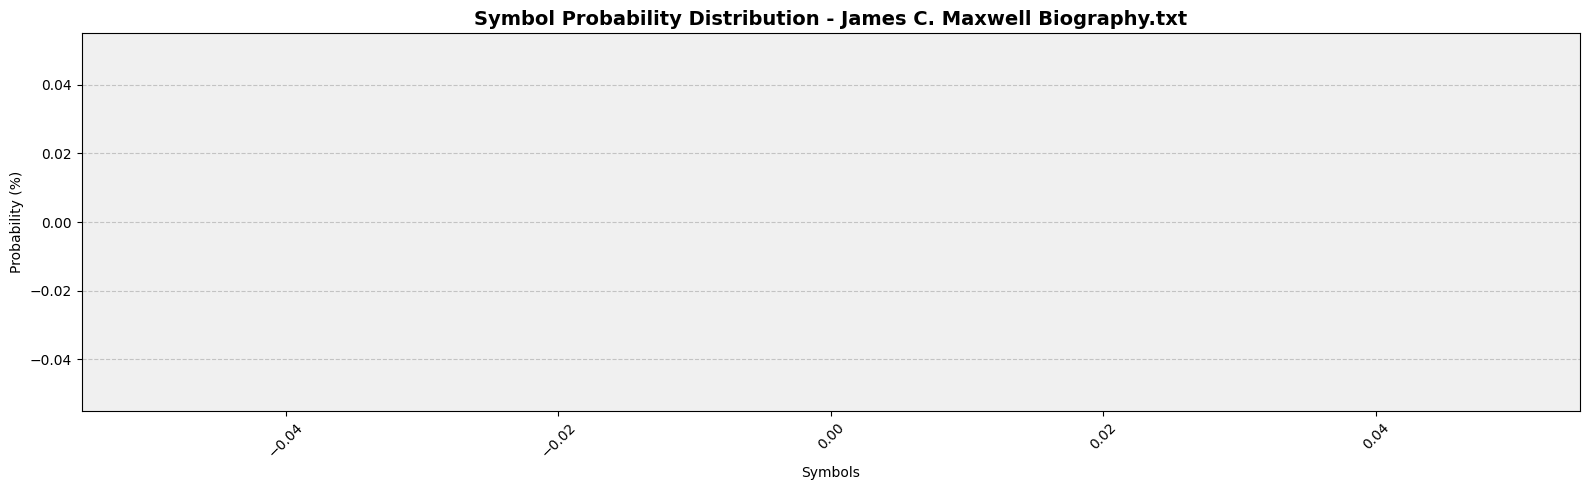

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_symbol_probabilities(df, top_n=100):
    """
    Clean and Beautiful Symbol Probability Visualization
    Handles multiple rows in CSV with filename-specific subplots
    """
    # Preprocess DataFrame
    symbol_columns = df.columns[5:]
    symbol_df = df[symbol_columns].apply(pd.to_numeric, errors='coerce')
    
    # Print total rows and symbols
    print(f"Total Rows in DataFrame: {len(df)}")
    print(f"Total Unique Symbols: {len(symbol_columns)}")
    
    # Create figure with subplots for each filename
    fig, axes = plt.subplots(len(df), 1, figsize=(16, 5*len(df)))
    
    # Ensure axes is always a list
    if len(df) == 1:
        axes = [axes]
    
    for row_idx, row in df.iterrows():
        filename = row['Filename']
        
        # Compute probabilities for this row
        current_probs = row[symbol_columns].apply(pd.to_numeric, errors='coerce')
        
        # Sort probabilities in descending order
        sorted_probs = current_probs.sort_values(ascending=False)
        
        # Select top N symbols
        top_symbols = sorted_probs.head(top_n)
        
        # Color palette
        colors = plt.cm.viridis(np.linspace(0, 1, len(top_symbols)))
        
        # Bar Plot with Enhanced Aesthetics
        bars = axes[row_idx].bar(top_symbols.index, top_symbols.values, color=colors)
        
        # Title and labels for each subplot
        axes[row_idx].set_title(f'Symbol Probability Distribution - {filename}', 
                                 fontsize=14, fontweight='bold')
        axes[row_idx].set_xlabel('Symbols', fontsize=10)
        axes[row_idx].set_ylabel('Probability (%)', fontsize=10)
        axes[row_idx].tick_params(axis='x', rotation=45)
        axes[row_idx].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[row_idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=8)
        
        # Subtle background
        axes[row_idx].set_facecolor('#f0f0f0')
    
    plt.tight_layout()
    plt.show()

# Read the CSV file
df = pd.read_csv('expanded_symbol_probabilities.csv')

# Plot Symbol Probabilities
plot_symbol_probabilities(df)


Total Rows in DataFrame: 1
Total Unique Symbols: 0


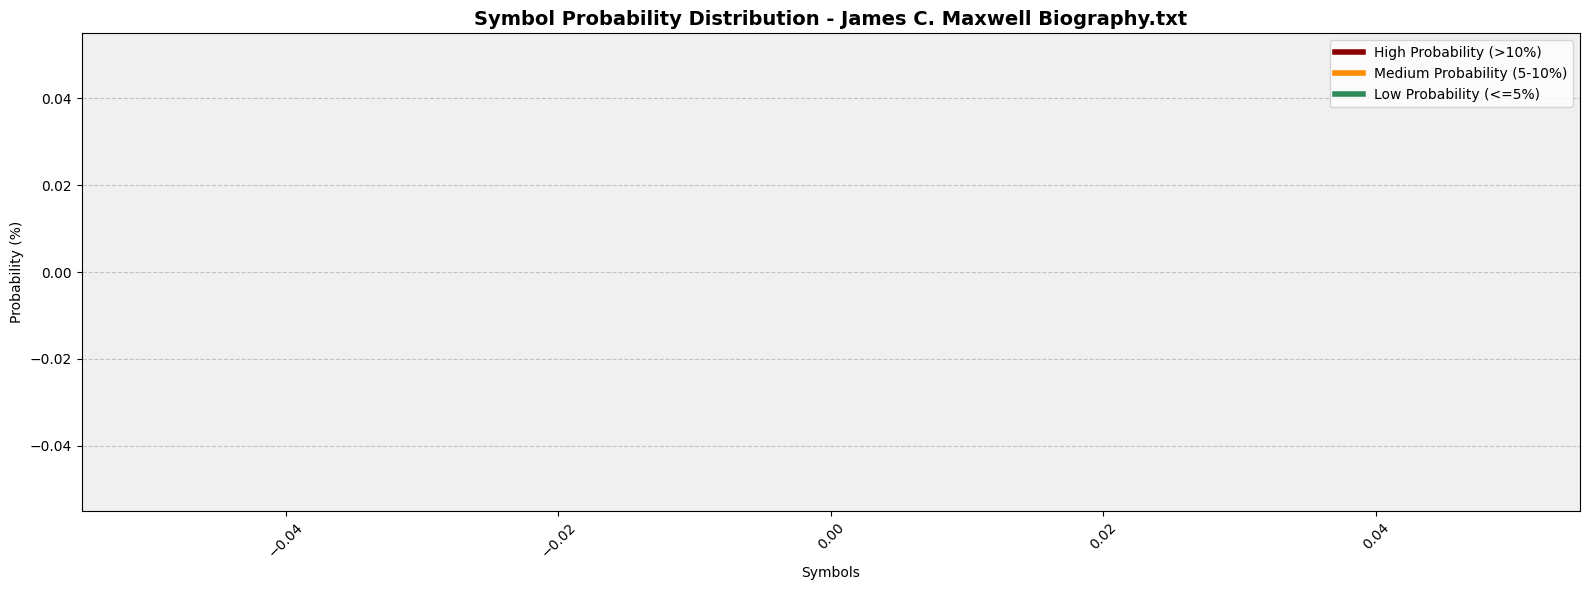

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_symbol_probabilities_color_coded(df, top_n=100):
    """
    Visualizes Symbol Probability Distribution with Color-Coded Groups
    """
    # Preprocess DataFrame
    symbol_columns = df.columns[5:]
    symbol_df = df[symbol_columns].apply(pd.to_numeric, errors='coerce')
    
    # Print total rows and symbols
    print(f"Total Rows in DataFrame: {len(df)}")
    print(f"Total Unique Symbols: {len(symbol_columns)}")
    
    # Create figure with subplots for each filename
    fig, axes = plt.subplots(len(df), 1, figsize=(16, 6 * len(df)))
    
    # Ensure axes is always a list
    if len(df) == 1:
        axes = [axes]
    
    for row_idx, row in df.iterrows():
        filename = row['Filename']
        
        # Compute probabilities for this row
        current_probs = row[symbol_columns].apply(pd.to_numeric, errors='coerce')
        
        # Sort probabilities in descending order
        sorted_probs = current_probs.sort_values(ascending=False)
        
        # Select top N symbols
        top_symbols = sorted_probs.head(top_n)
        
        # Assign color groups based on probability ranges
        color_groups = []
        for prob in top_symbols.values:
            if prob > 10:  # High probability
                color_groups.append('darkred')
            elif 5 < prob <= 10:  # Medium probability
                color_groups.append('darkorange')
            else:  # Low probability
                color_groups.append('seagreen')
        
        # Bar Plot with Color-Coded Groups
        bars = axes[row_idx].bar(top_symbols.index, top_symbols.values, color=color_groups)
        
        # Title and labels for each subplot
        axes[row_idx].set_title(f'Symbol Probability Distribution - {filename}', 
                                 fontsize=14, fontweight='bold')
        axes[row_idx].set_xlabel('Symbols', fontsize=10)
        axes[row_idx].set_ylabel('Probability (%)', fontsize=10)
        axes[row_idx].tick_params(axis='x', rotation=45)
        axes[row_idx].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[row_idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=8)
        
        # Subtle background
        axes[row_idx].set_facecolor('#f0f0f0')
        
        # Add legend for color groups
        custom_legend = [
            plt.Line2D([0], [0], color='darkred', lw=4, label='High Probability (>10%)'),
            plt.Line2D([0], [0], color='darkorange', lw=4, label='Medium Probability (5-10%)'),
            plt.Line2D([0], [0], color='seagreen', lw=4, label='Low Probability (<=5%)')
        ]
        axes[row_idx].legend(handles=custom_legend, loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Read the CSV file
df = pd.read_csv('expanded_symbol_probabilities.csv')

# Plot Symbol Probabilities with Color-Coded Groups
plot_symbol_probabilities_color_coded(df)


In [33]:
import numpy as np
import pandas as pd

def binary_to_binary_csv(binary_file, csv_file):
    """
    Convert binary file to binary (0/1) CSV
    
    Args:
        binary_file (str): Path to input binary file
        csv_file (str): Path to output CSV file
    """
    # Read binary file as uint8 (byte) data
    binary_data = np.fromfile(binary_file, dtype=np.uint8)
    
    # Convert bytes to binary representation
    binary_strings = [format(byte, '08b') for byte in binary_data]
    
    # Create DataFrame with binary digits
    binary_df = pd.DataFrame([list(map(int, list(binary_str))) for binary_str in binary_strings])
    
    # Save to CSV
    binary_df.to_csv(csv_file, index=False, header=False)
    
    print(f"Converted {binary_file} to binary CSV: {csv_file}")
    print(f"Shape of binary data: {binary_df.shape}")

# Example usage
binary_file = 'encoded/sample1.bin'
csv_file = f'binary{3}.csv'
binary_to_binary_csv(binary_file, csv_file)


Converted encoded/sample1.bin to binary CSV: binary3.csv
Shape of binary data: (12, 8)


In [34]:
import heapq
import csv

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freqs):
    heap = [Node(char, freq) for char, freq in freqs.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.freq + right.freq)
        merged.left, merged.right = left, right
        heapq.heappush(heap, merged)
    
    return heap[0]

def generate_codes(node, prefix="", codebook={}):
    if node:
        if node.char:
            codebook[node.char] = prefix
        generate_codes(node.left, prefix + "0", codebook)
        generate_codes(node.right, prefix + "1", codebook)
    return codebook

def encode_input(input_text, codebook):
    encoded_chars = []
    unknown_chars = []
    
    for char in input_text:
        if char in codebook:
            encoded_chars.append((char, codebook[char]))
        else:
            unknown_chars.append(char)
    
    # Print detailed encoding information
    print("\nDetailed Encoding:")
    print("Original Text:", input_text)
    print("\nCharacter-wise Encoding:")
    for char, code in encoded_chars:
        print(f"  '{char}': {code}")
    
    if unknown_chars:
        print("\nUnknown Characters (not in codebook):")
        print("  ", ", ".join(repr(char) for char in unknown_chars))
    
    # Return the full encoded string
    return ''.join(code for _, code in encoded_chars)


def parse_probabilities(prob_str):
    freqs = {}
    # Handle different probability string formats
    prob_items = prob_str.split(';') if ';' in prob_str else prob_str.split(' ')
    
    for item in prob_items:
        try:
            # Handle multiple parsing strategies
            item = item.strip()
            
            # Skip empty items
            if not item:
                continue
            
            # Split by ':' with multiple strategies
            if ':' in item:
                parts = item.split(':', 1)
            else:
                parts = item.split()
            
            # Normalize special characters
            char = parts[0].strip()
            char = (char.replace('SPACE', ' ')
                        .replace('\\n', '\n')
                        .replace('\\t', '\t')
                        .replace('(', '')
                        .replace(')', '')
                        .strip())
            
            # Extract probability value
            if len(parts) > 1:
                prob_str = parts[1].strip().replace('%', '')
                prob_parts = prob_str.split()
                
                # Find first float-like value
                for prob_part in prob_parts:
                    try:
                        prob = float(prob_part) / 100
                        freqs[char] = prob
                        break
                    except ValueError:
                        continue
            
            # Fallback parsing
            if not freqs and len(parts) > 1:
                try:
                    prob = float(parts[1].strip().replace('%', '')) / 100
                    freqs[char] = prob
                except ValueError:
                    print(f"Warning: Could not parse probability for {char}")
        
        except Exception as e:
            print(f"Warning: Error parsing item {item}: {e}")
    
    return freqs

def process_csv(file_path):
    file_info = []
    
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip the header row

        for row in reader:
            try:
                filename = row[0]
                symbol_probabilities = row[5].strip()  # Strip extra spaces or newlines

                freqs = parse_probabilities(symbol_probabilities)
                
                # Detailed debugging
                print(f"Parsed frequencies for {filename}:")
                for char, prob in freqs.items():
                    print(f"  {repr(char)}: {prob}")
                
                # Only proceed if frequencies are not empty
                if freqs:
                    root = build_huffman_tree(freqs)
                    codebook = generate_codes(root)
                    
                    file_info.append({
                        "Filename": filename,
                        "Symbol Probabilities": symbol_probabilities,
                        "Huffman Codebook": codebook,
                        "Frequencies": freqs
                    })
                else:
                    print(f"Warning: No valid frequencies found for {filename}")
            
            except Exception as e:
                print(f"Error processing row for {filename}: {e}")
    
    return file_info

# Example usage with your CSV file path
file_path = 'output.csv'  # Replace with your CSV file path
file_data = process_csv(file_path)

for info in file_data:
    print(f"\nFilename: {info['Filename']}")
    
    input_text = "anton rejoe P CB.EN.U4ECE22009"
    encoded = encode_input(input_text, info['Huffman Codebook'])
    
    print(f"\nFull Encoded Bitstring: {encoded}")
    print(f"Encoded Length: {len(encoded)} bits")


Parsed frequencies for James C. Maxwell Biography.txt:
  'Tab': 0.00086096
  'Semicolon': 0.00021524

Filename: James C. Maxwell Biography.txt

Detailed Encoding:
Original Text: anton rejoe P CB.EN.U4ECE22009

Character-wise Encoding:

Unknown Characters (not in codebook):
   'a', 'n', 't', 'o', 'n', ' ', 'r', 'e', 'j', 'o', 'e', ' ', 'P', ' ', 'C', 'B', '.', 'E', 'N', '.', 'U', '4', 'E', 'C', 'E', '2', '2', '0', '0', '9'

Full Encoded Bitstring: 
Encoded Length: 0 bits


In [35]:
import heapq
import csv
import re

# Define HuffmanNode class and supporting functions
class HuffmanNode:
    def __init__(self, char, prob):
        self.char = char
        self.prob = prob
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.prob < other.prob


def build_huffman_tree(probabilities):
    # Create a priority queue with initial nodes
    priority_queue = [HuffmanNode(char, prob) for char, prob in probabilities.items()]
    heapq.heapify(priority_queue)

    # Build the Huffman tree
    while len(priority_queue) > 1:
        # Pop two nodes with the smallest probabilities
        left = heapq.heappop(priority_queue)
        right = heapq.heappop(priority_queue)

        # Create a new node with combined probability
        merged = HuffmanNode(None, left.prob + right.prob)
        merged.left = left
        merged.right = right

        # Push the merged node back into the queue
        heapq.heappush(priority_queue, merged)

    # The remaining node is the root of the Huffman tree
    return priority_queue[0]


def generate_huffman_codes(node, prefix="", codebook=None):
    if codebook is None:
        codebook = {}

    if node is not None:
        # If it's a leaf node, assign the code
        if node.char is not None:
            codebook[node.char] = prefix
        else:
            # Traverse the left and right subtrees
            generate_huffman_codes(node.left, prefix + "0", codebook)
            generate_huffman_codes(node.right, prefix + "1", codebook)

    return codebook


# Read the CSV file and extract probabilities
probabilities = {}

with open("output.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip header
    for row in csv_reader:
        # The "Symbol Probabilities" column is the last one
        if len(row) > 5:
            symbol_probabilities = row[5]

            # Extract each symbol and its probability using regex
            matches = re.findall(r'(.*?)\s*:\s*([\d\.]+)%', symbol_probabilities)
            for match in matches:
                char = match[0].strip()
                prob = float(match[1]) / 100  # Convert percentage to a decimal
                probabilities[char] = prob

# Build Huffman Tree and generate codes
if probabilities:
    huffman_tree = build_huffman_tree(probabilities)
    huffman_codes = generate_huffman_codes(huffman_tree)
    huffman_codes  # Display the generated Huffman codes for all characters
else:
    "No valid probabilities found in the CSV file."



In [36]:
import heapq

# Re-run the Huffman code generation process
huffman_tree = build_huffman_tree(probabilities)
huffman_codes = generate_huffman_codes(huffman_tree)

huffman_codes  # Display the generated Huffman codes for all characters


{'e': '000',
 'r': '0010',
 'o': '0011',
 'w': '010000',
 'E': '01000100',
 '7': '010001010',
 '- (Minus)': '0100010110',
 '0': '01000101110',
 '[ (Open Square Bracket)': '010001011110',
 'Y': '010001011111',
 '\\" (Double Quote)': '01000110000',
 'Q': '010001100010',
 '”': '010001100011',
 '“': '010001100100',
 '– (En Dash)': '010001100101',
 'I': '01000110011',
 '2': '01000110100',
 '? (Question Mark)': '01000110101',
 'G': '010001101100',
 '] (Close Square Bracket)': '010001101101',
 '; (Semicolon)': '010001101110',
 ': (Colon)': '010001101111',
 'W': '0100011100',
 '9': '0100011101',
 'z': '0100011110',
 '/ (Forward Slash)': '0100011111',
 'x': '0100100',
 "\\' (Single Quote)": '01001010',
 '8': '01001011',
 'p': '010011',
 'n': '0101',
 't': '0110',
 'c': '01110',
 'f': '011110',
 'v': '0111110',
 'K': '011111100',
 'S': '011111101',
 'H': '011111110',
 'q': '0111111110',
 '6': '0111111111',
 'i': '1000',
 'a': '1001',
 'd': '10100',
 '. (Period/Dot)': '1010100',
 'M': '1010101',


In [37]:
input_string = "Anton Rejoe P CB.EN.U4ECE22009"

# Encode the string using the Huffman codes
encoded_string = "".join(huffman_codes[char] for char in input_string)

KeyError: ' '